In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os

sys.path.append('../..')
from fastmbartools import FastMBARSolver

We show that FastMBAR can also handle temperature replica exchange. Here we use the temperature replica exchange simulation data from a paper: doi: https://doi.org/10.1101/2023.04.19.537533

To compute PMF for temperature replica exchange simulation, unbiased potential energy of the samples is also required. 

We aim to compute the PMF along radius of gyration (Rg). Rg of samples is provided in 'data/rg.csv', and unbiased energy of samples is provided in 'data/energy.csv'. 

In [2]:
df_rg = pd.read_csv('data/rg.csv')
df_energy = pd.read_csv('data/energy.csv')
n_replicas = 6
T = 1/np.linspace(1/300, 1/400, n_replicas)
cv = []
unbiased_energy = []
for i in range(n_replicas):
    cv.append(df_rg['%.2f K' % T[i]].to_numpy())
    unbiased_energy.append(df_energy['%.2f K' % T[i]].to_numpy())
solver = FastMBARSolver(T, cv, kB=8.314e-3, unbiased_energy=unbiased_energy)
solver.solve()

/state/partition1/user/sliu/ipykernel_51201/1939115001.py:8: RuntimeWarning: divide by zero encountered in log
  pmf1 = -np.log(hist1)
/state/partition1/user/sliu/ipykernel_51201/1939115001.py:9: RuntimeWarning: divide by zero encountered in log
  pmf2 = -np.log(hist2)


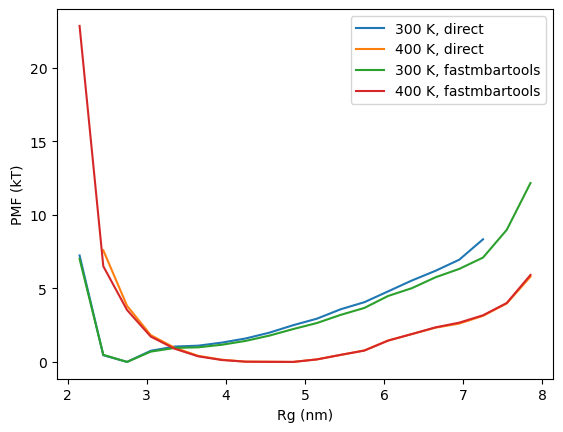

In [3]:
# let's compare free energy computed by FastMBAR with free energy directly computed form 300 K and 400 K samples
bins = np.linspace(2, 8, 21)
x = 0.5*(bins[1:] + bins[:-1])
rg1 = df_rg['300.00 K'].to_numpy()
rg2 = df_rg['400.00 K'].to_numpy()
hist1, _ = np.histogram(rg1, bins)
hist2, _ = np.histogram(rg2, bins)
pmf1 = -np.log(hist1)
pmf2 = -np.log(hist2)
pmf1 -= np.amin(pmf1)
pmf2 -= np.amin(pmf2)
plt.plot(x, pmf1, label='300 K, direct')
plt.plot(x, pmf2, label='400 K, direct')
result1 = solver.compute_pmf(300, cv, [bins])
plt.plot(result1['x'].to_numpy(), result1['PMF (kT)'].to_numpy(), label='300 K, fastmbartools')
result2 = solver.compute_pmf(400, cv, [bins])
plt.plot(result2['x'].to_numpy(), result2['PMF (kT)'].to_numpy(), label='400 K, fastmbartools')
plt.xlabel('Rg (nm)')
plt.ylabel('PMF (kT)')
plt.legend()
plt.show()
plt.close()

Based on the check, we can see FastMBARSolver works properly, as the free energy computed at 300 K and 400 K by fastmbartools is almost identical to directly computing PMF by making histogram of 300 K and 400 K simulatio data. The advantage of FastMBAR is it can combine data at various temperatures and hopefully give more accurate PMF, and also give PMF at other temperatures. 

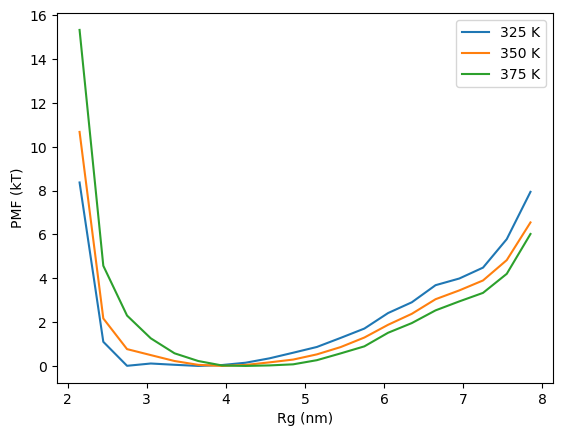

In [4]:
# with fastmbartools, we can also compute PMF at various temperatures
for T in [325, 350, 375]:
    result = solver.compute_pmf(T, cv, [bins])
    plt.plot(result['x'].to_numpy(), result['PMF (kT)'].to_numpy(), label=f'{T} K')
plt.xlabel('Rg (nm)')
plt.ylabel('PMF (kT)')
plt.legend()
plt.show()
plt.close()